### K-Means Clustering 

###### https://www.kaggle.com/code/prashant111/k-means-clustering-with-python
###### https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

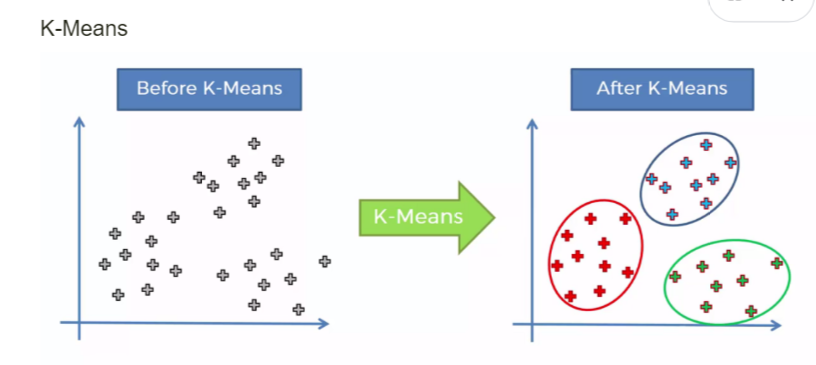

#### K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-

- Image segmentation

- Customer segmentation

- Species clustering

- Anomaly detection

- Clustering languages

In [108]:
data = pd.read_csv("Live.csv")
df = pd.DataFrame(data)

In [109]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [110]:
df.shape 

(7050, 16)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [112]:
df.drop(["Column1", "Column2", "Column3", "Column4"], axis=1, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [114]:
df.duplicated().sum()

51

In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.duplicated().sum()

0

In [117]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [118]:
df["status_id"].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [119]:
len(df["status_id"].unique())

6997

In [120]:
len(df["status_published"].unique())

6913

In [121]:
len(df["status_type"].unique())

4

In [122]:
df.drop(["status_id", "status_published"], axis=1, inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    6999 non-null   object
 1   num_reactions  6999 non-null   int64 
 2   num_comments   6999 non-null   int64 
 3   num_shares     6999 non-null   int64 
 4   num_likes      6999 non-null   int64 
 5   num_loves      6999 non-null   int64 
 6   num_wows       6999 non-null   int64 
 7   num_hahas      6999 non-null   int64 
 8   num_sads       6999 non-null   int64 
 9   num_angrys     6999 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 601.5+ KB


In [124]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [125]:
df["status_type"].value_counts()

status_type
photo     4244
video     2333
status     359
link        63
Name: count, dtype: int64

In [126]:
status_type = df["status_type"].value_counts().index

<Axes: xlabel='status_type', ylabel='count'>

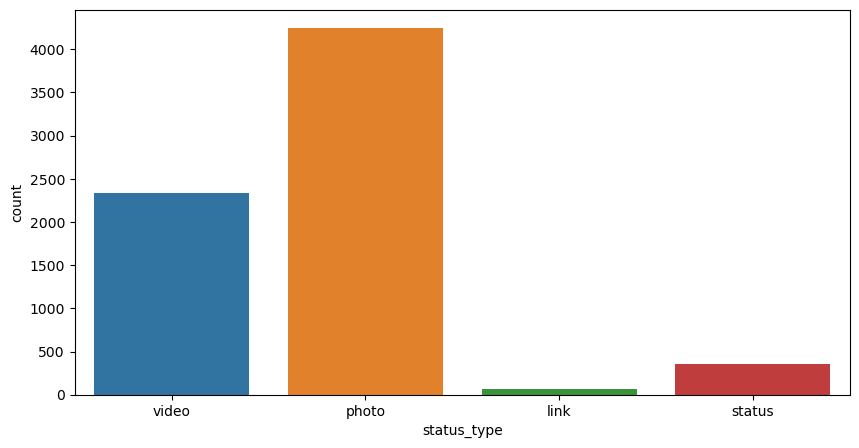

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(df,x = "status_type")

In [128]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [129]:
fig = px.scatter(df, x="num_reactions", y="num_angrys", color="status_type")
fig.show()

In [130]:
fig = px.scatter(df, x="num_reactions", y="num_comments", color="status_type")
fig.show()

In [131]:
fig = px.scatter(df, x="num_reactions", y="num_shares", color="status_type")
fig.show()

In [132]:
fig = px.scatter(df, x="num_reactions", y="num_loves", color="status_type")
fig.show()

In [133]:
fig = px.scatter(df, x="num_reactions", y="num_comments", color="status_type")
fig.show()

In [ ]:
sns.pairplot(df)

###  Declare feature vector and target variable

In [135]:
X = df
y = df["status_type"]

### Convert categorical variable into integers

In [136]:
X["status_type"] = X["status_type"].map({"photo": 0, "video": 1, "status": 2, "link": 3})

In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    6999 non-null   int64
 1   num_reactions  6999 non-null   int64
 2   num_comments   6999 non-null   int64
 3   num_shares     6999 non-null   int64
 4   num_likes      6999 non-null   int64
 5   num_loves      6999 non-null   int64
 6   num_wows       6999 non-null   int64
 7   num_hahas      6999 non-null   int64
 8   num_sads       6999 non-null   int64
 9   num_angrys     6999 non-null   int64
dtypes: int64(10)
memory usage: 601.5 KB


In [140]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,0,150,0,0,150,0,0,0,0,0
2,1,227,236,57,204,21,1,1,0,0
3,0,111,0,0,111,0,0,0,0,0
4,0,213,0,0,204,9,0,0,0,0


### Feature Scaling

In [141]:
cols = X.columns

In [145]:
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [146]:
X = pd.DataFrame(X, columns=[cols])

In [147]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.333333,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.000000,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.333333,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.000000,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [148]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [149]:
kmeans.cluster_centers_

array([[1.94289029e-15, 3.65882845e-02, 7.37279410e-04, 7.27662803e-04,
        3.60939185e-02, 2.06146523e-03, 2.22319788e-03, 1.19014030e-03,
        2.47639112e-03, 1.28454592e-03],
       [3.92014519e-01, 6.49939697e-02, 2.61633705e-02, 2.87493427e-02,
        5.76390350e-02, 4.61317046e-02, 8.02465106e-03, 9.46050609e-03,
        7.77196541e-03, 7.04876764e-03]])

### Inertia is not a normalized metric.

- The lower values of inertia are better and zero is optimal.

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.

In [96]:
kmeans.inertia_

245.88632349757592

In [150]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 0 out of 6999 samples were correctly labeled.


In [98]:
print("Accuracy score: {0:0.2f}".format(correct_labels / float(y.size)))

Accuracy score: 0.00


### Use elbow method to find optimal number of clusters

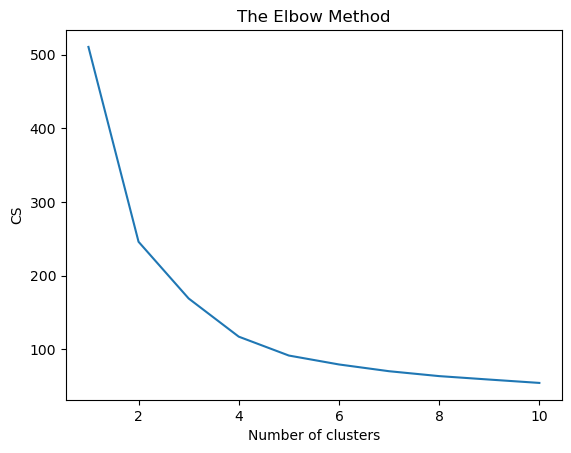

In [99]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

In [101]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}".format(correct_labels / float(y.size)))

Result: 0 out of 6999 samples were correctly labeled.
Accuracy score: 0.00


##### KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)

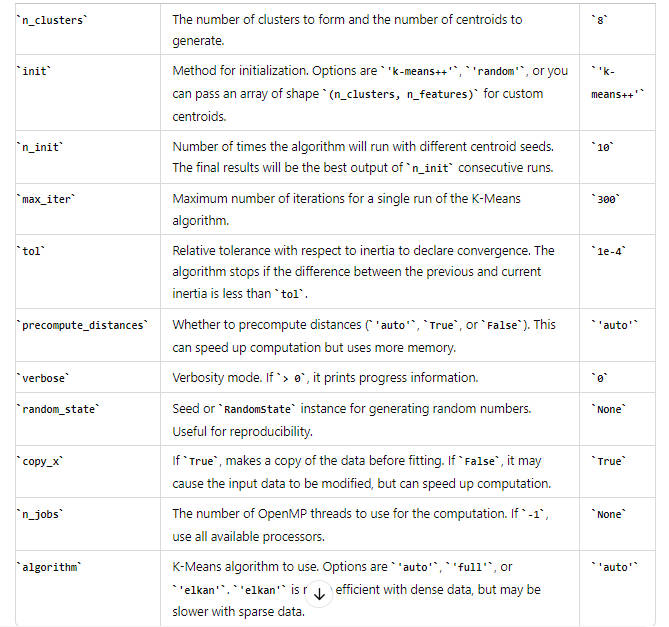

In [38]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [8]:
data = pd.read_csv("Mall_Customers.csv")

In [9]:
df = pd.DataFrame(data)

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.shape

(200, 5)

In [12]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

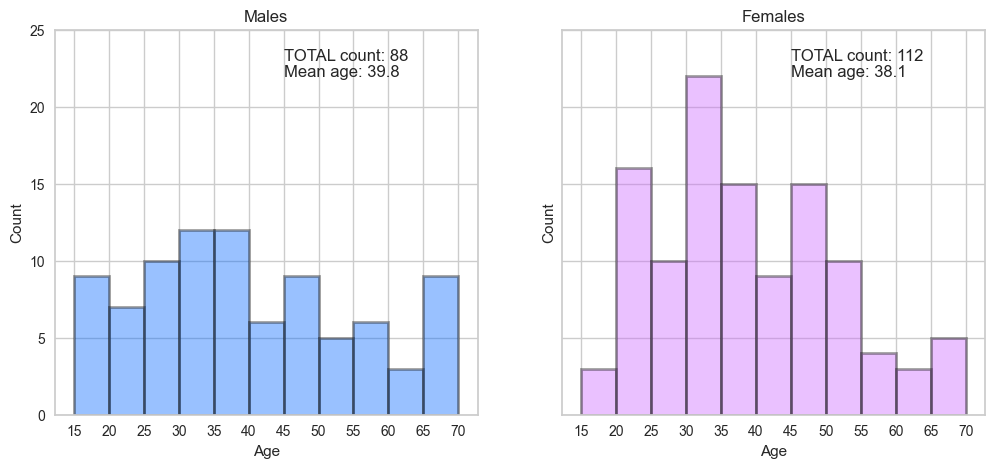

In [16]:
males_age = df[df["Genre"] == "Male"]["Age"]  # subset with males age
females_age = df[df["Genre"] == "Female"]["Age"]  # subset with females age

age_bins = range(15, 75, 5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.distplot(
    males_age,
    bins=age_bins,
    kde=False,
    color="#0066ff",
    ax=ax1,
    hist_kws=dict(edgecolor="k", linewidth=2),
)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(45, 23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45, 22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(
    females_age,
    bins=age_bins,
    kde=False,
    color="#cc66ff",
    ax=ax2,
    hist_kws=dict(edgecolor="k", linewidth=2),
)
ax2.set_xticks(age_bins)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(45, 23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [17]:
labels = df["Genre"].value_counts().index
values = df["Genre"].value_counts().values

plt.figure(figsize=(12, 6))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.45)])
fig.show()

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Figure size 1200x1000 with 0 Axes>

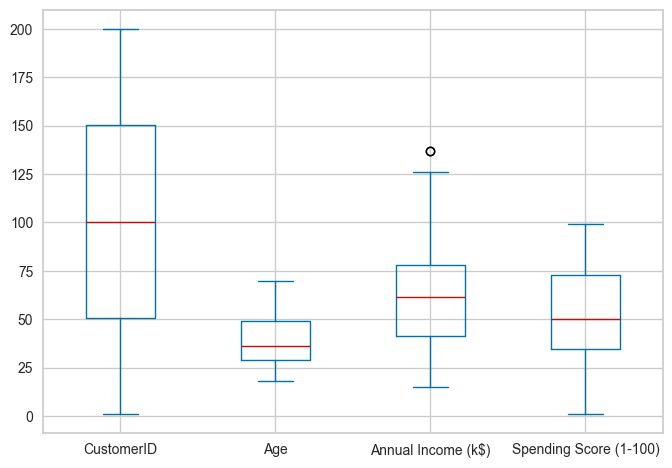

In [18]:
plt.figure(figsize=(12,10))
df.plot(kind="box")

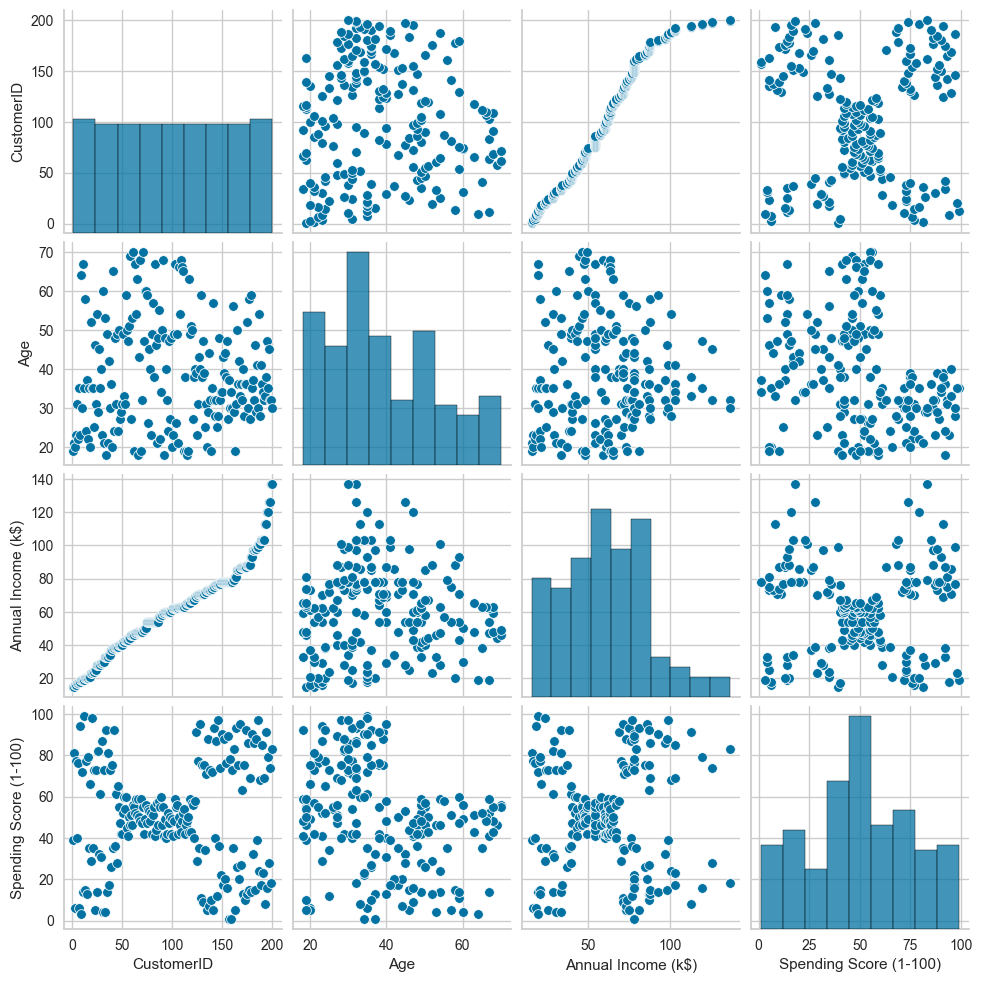

In [19]:
sns.pairplot(df)

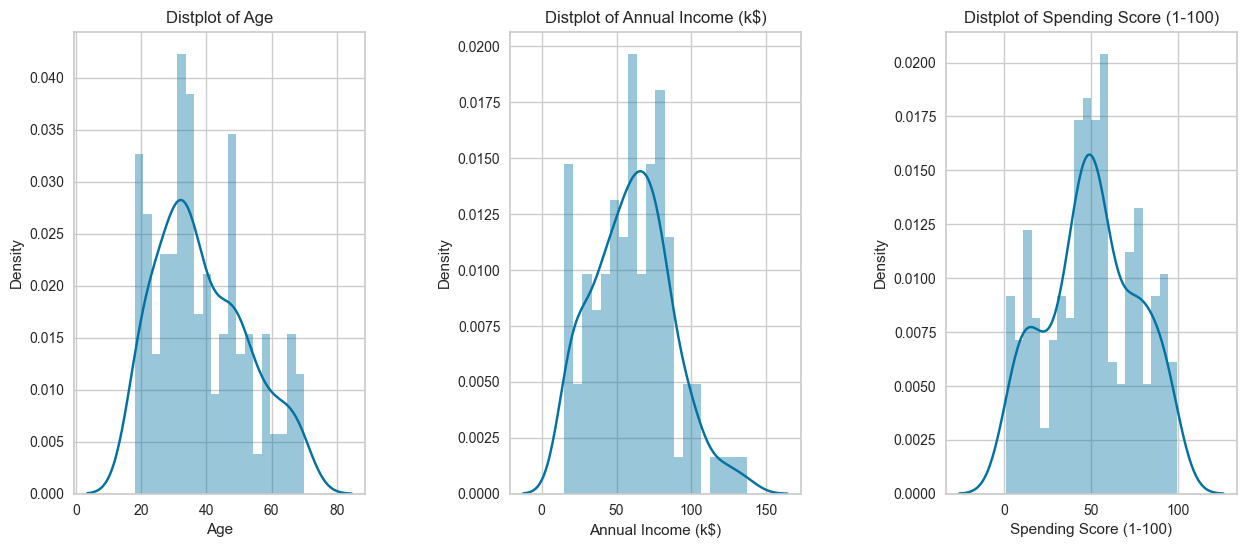

In [20]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

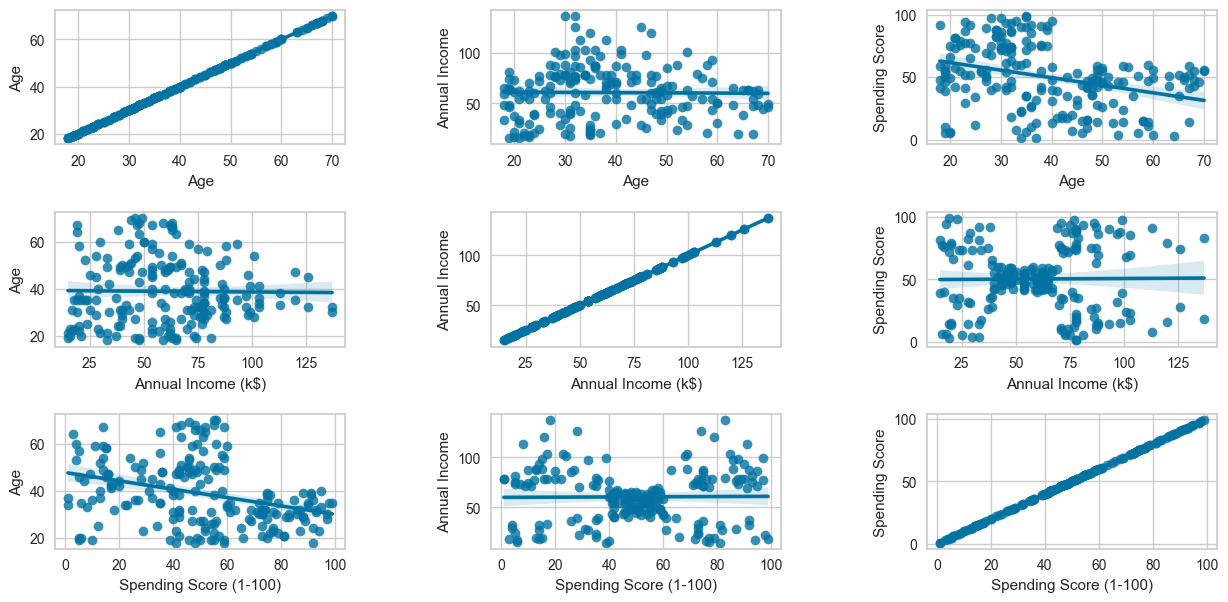

In [21]:
plt.figure(1, figsize=(15, 7))
n = 0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    for y in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0] + " " + y.split()[1] if len(y.split()) > 1 else y)
plt.show()

In [42]:
fig = px.scatter(df, x="Age", y="Annual Income (k$)", color="Genre")
fig.show()

In [ ]:
fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", color="Genre")
fig.show()

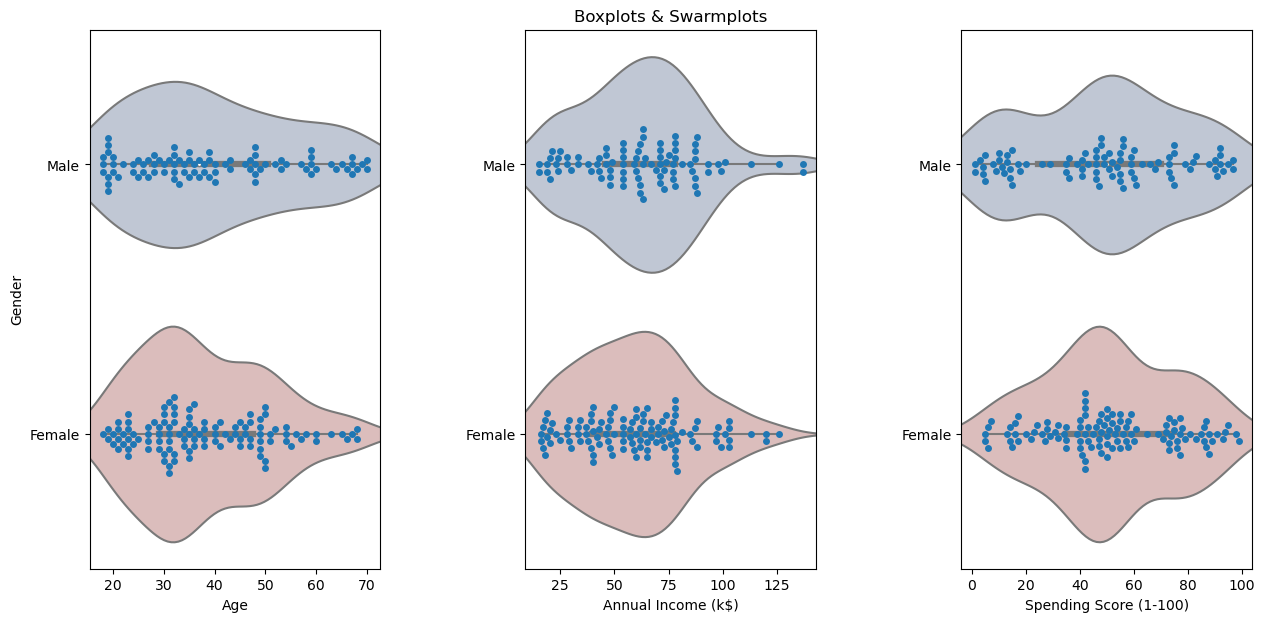

In [ ]:
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y="Genre", data=df, palette="vlag")
    sns.swarmplot(x=cols, y="Genre", data=df)
    plt.ylabel("Gender" if n == 1 else "")
    plt.title("Boxplots & Swarmplots" if n == 2 else "")
plt.show()

In [52]:
X_numerics = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

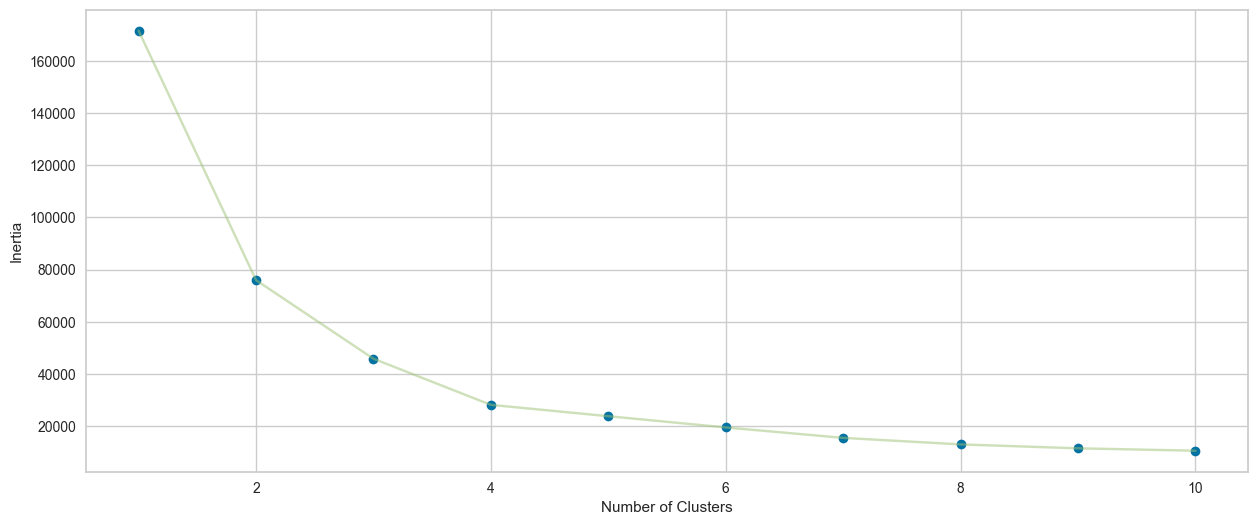

In [23]:
X1 = df[["Age", "Spending Score (1-100)"]].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(
        n_clusters=n,
        init="k-means++",
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm="elkan",
    )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, "o")
plt.plot(np.arange(1, 11), inertia, "-", alpha=0.5)
plt.xlabel("Number of Clusters"), plt.ylabel("Inertia")
plt.show()

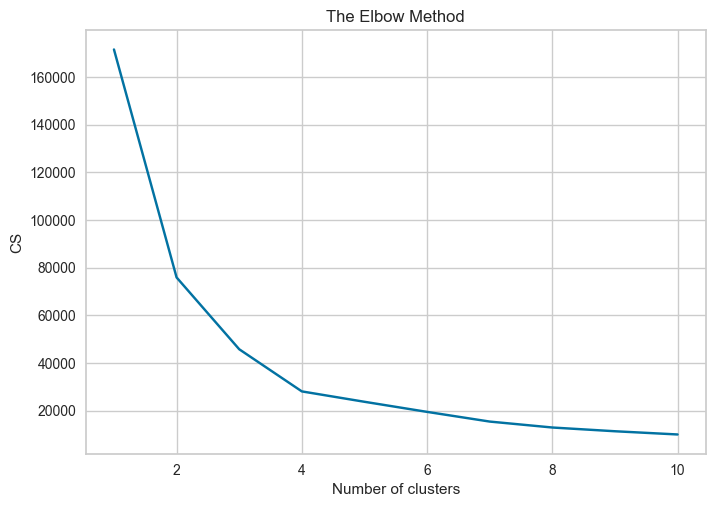

In [27]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(X1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

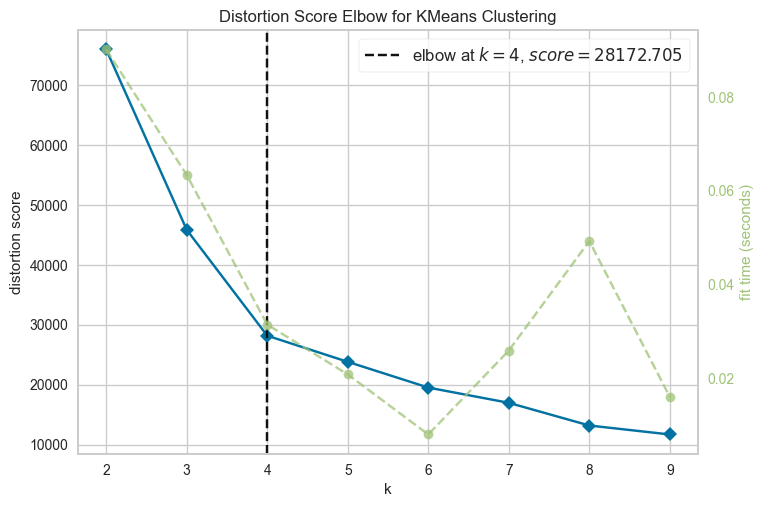

In [28]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X1)
visualizer.show()
plt.show()

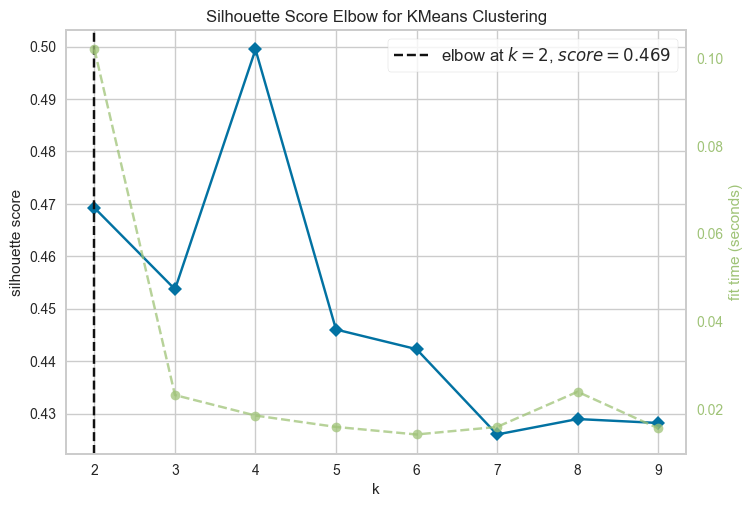

In [29]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette")

visualizer.fit(X1)
visualizer.show()
plt.show()

In [53]:
KM_5_clusters = KMeans(n_clusters=5, init="k-means++").fit(
    X_numerics
)  # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:, "Cluster"] = KM_5_clusters.labels_  # append labels to points

In [57]:
KM_clust_sizes = KM5_clustered.groupby("Cluster").size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,76
1,39
2,37
3,25
4,23


In [48]:
df["label3"] = labels1

trace1 = go.Scatter3d(
    x=df["Age"],
    y=df["Spending Score (1-100)"],
    z=df["Annual Income (k$)"],
    mode="markers",
    marker=dict(
        color=df["label3"],
        size=20,
        line=dict(color=df["label3"], width=12),
        opacity=0.8,
    ),
)
data = [trace1]
layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
    title="Clusters",
    scene=dict(
        xaxis=dict(title="Age"),
        yaxis=dict(title="Spending Score"),
        zaxis=dict(title="Annual Income"),
    ),
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)